In [1]:

import pandas as pd
import numpy as np
from bertopic import BERTopic
import matplotlib.pyplot as plt

/media/4TB/elisa/AIxPA/env_aixpa/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# =============================================================================
# SEZIONE 1: Caricamento del modello di BERTopic allenato sui nostri dati 
# -----------------------------------------------------------------------------
# Questa sezione del notebook:
# 1) Imposta la cartella dei risultati e la sottocartella del modello.
# 2) Carica in memoria il modello BERTopic precedentemente salvato.
# =============================================================================

mydir = './Results/'
model_folder =  "BERTopicModel/"
topic_model = BERTopic.load(mydir + model_folder)

In [9]:
# =============================================================================
# SEZIONE 2: Visualizzazione della gerarchia dei topic
# -----------------------------------------------------------------------------
# Questa sezione del notebook:
# 1) Genera il dendrogramma interattivo dei topic tramite BERTopic.
# 2) Esporta la visualizzazione in formato HTML, salvandola nella cartella risultati.
#    (Il file HTML è interattivo: può essere aperto con un browser e condiviso facilmente.)
# =============================================================================
hierarchical_topics = pd.read_csv(mydir + "hierarchical_topics.csv", index_col=0)

fig1 = topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)
fig1.write_html(mydir + "/Dendrogram_taxonomy.html")


In [7]:
# =============================================================================
# SEZIONE 3: Etichettatura e salvataggio del dendrogramma rinominato
# -----------------------------------------------------------------------------
# Questa sezione del notebook:
# 1) Legge il file TSV con l’overview dei topic (Topic, Label).
# 2) Costruisce una mappa {topic_id -> etichetta} e ne ripulisce gli spazi.
# 3) Imposta le etichette personalizzate nel modello BERTopic.
# 4) Visualizza la gerarchia con le etichette personalizzate (anteprima interattiva).
# 5) Esporta l’HTML del dendrogramma rinominato nella cartella dei risultati.
# =============================================================================

df = pd.read_csv(mydir + "topics_overview.tsv", sep="\t")
label_map = dict(zip(df['Topic'], df['Label']))
label_map = {k: v.strip() for k, v in label_map.items()}
topic_model.set_topic_labels(label_map)
topic_model.visualize_hierarchy(custom_labels=True).show()
fig1 = topic_model.visualize_hierarchy(custom_labels=True)
fig1.write_html(mydir+"/Dendrogram_taxonomy_renamed.html")


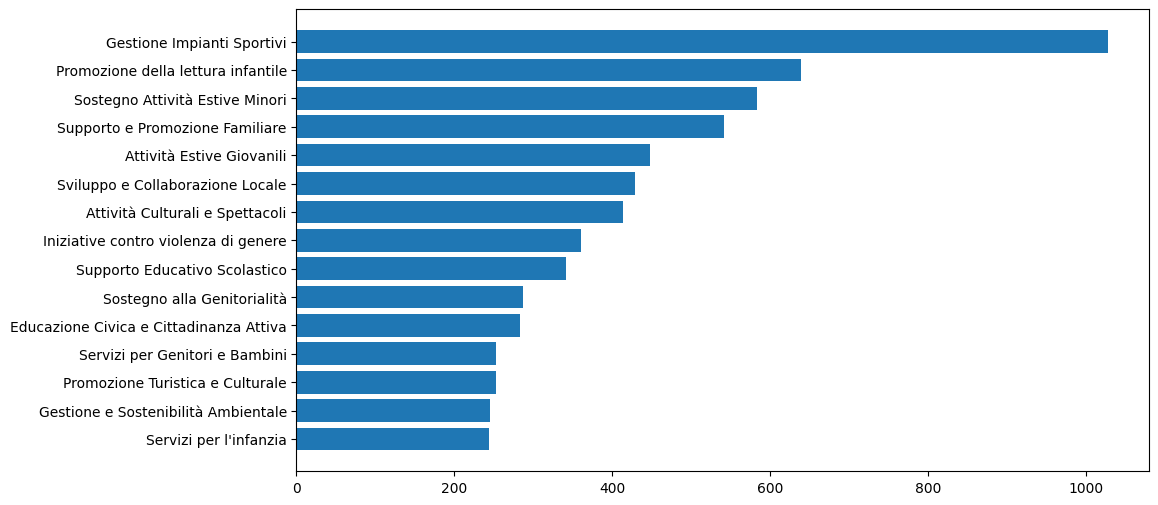

In [5]:
# =============================================================================
# SEZIONE 4: Grafico delle 15 categorie più frequenti
# -----------------------------------------------------------------------------
# Questa sezione del notebook:
# 1) Seleziona e mostra le 15 etichette (Label) con il conteggio (Count) più alto.
# =============================================================================

# If your columns have leading "#", normalize them once
df_plot = df.rename(columns=lambda c: c.replace('#', '').strip())

# Take the 15 most frequent
top = (df_plot[['Label', 'Count']]
       .sort_values('Count', ascending=False)
       .head(15)
       .copy())

# Plot (horizontal so long labels fit)
plt.figure(figsize=(11, 6))
plt.barh(top['Label'], top['Count'])
plt.gca().invert_yaxis()
